Importing modules

In [2]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from keras.preprocessing.image import img_to_array, load_img
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

In [3]:
!unzip Train_UQcUa52.zip


^C


In [4]:
df =pd.read_csv('train.csv')
df.head()


,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [5]:
image_path= 'Images/train/'

In [6]:
X = np.array([img_to_array(load_img(image_path+df['filename'][i], target_size=(
    28, 28, 1), color_mode='grayscale')) for i in tqdm(range(df.shape[0]))]).astype('float32')


  0%|          | 0/49000 [00:00<?, ?it/s]

In [21]:
y=df['label']

In [22]:
print(X.shape,y.shape)

(49000, 28, 28, 1) (49000,)


4


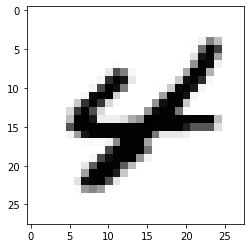

In [23]:
image_index = 0
print(y[image_index])
plt.imshow(X[image_index].reshape(28, 28),cmap='Greys')

7


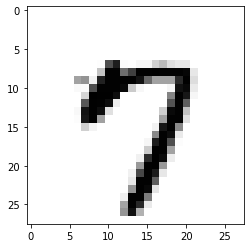

In [24]:
image_index = 100
print(y[image_index])
plt.imshow(X[image_index].reshape(28, 28),cmap='Greys')

Train-Test split

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=np.array(y))

Normalization

In [26]:
x_train /=255
x_test /=255

input_shape = (28, 28, 1)
output_classes = 10

Model Creation

In [93]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, MaxPooling2D, Conv2D

model = Sequential()
model.add(Conv2D(28, kernel_size=(3, 3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(64, activation=tf.nn.relu))
model.add(Dense(output_classes, activation=tf.nn.softmax))
# model.add(Dropout(0.3))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Training the model

In [95]:

model.fit(x=x_train,y=y_train, epochs=25,batch_size=64,validation_data=(x_test, y_test))

Epoch 1/25
575/575 [==============================] - 7s 11ms/step - loss: 0.3252 - accuracy: 0.9020 - val_loss: 0.1248 - val_accuracy: 0.9619
Epoch 2/25
575/575 [==============================] - 6s 10ms/step - loss: 0.1337 - accuracy: 0.9592 - val_loss: 0.0906 - val_accuracy: 0.9711
Epoch 3/25
575/575 [==============================] - 6s 10ms/step - loss: 0.0922 - accuracy: 0.9710 - val_loss: 0.0746 - val_accuracy: 0.9758
Epoch 4/25
575/575 [==============================] - 6s 11ms/step - loss: 0.0699 - accuracy: 0.9782 - val_loss: 0.0677 - val_accuracy: 0.9787
Epoch 5/25
575/575 [==============================] - 7s 12ms/step - loss: 0.0598 - accuracy: 0.9807 - val_loss: 0.0600 - val_accuracy: 0.9819
Epoch 6/25
575/575 [==============================] - 7s 12ms/step - loss: 0.0508 - accuracy: 0.9836 - val_loss: 0.0646 - val_accuracy: 0.9816
Epoch 7/25
575/575 [==============================] - 7s 13ms/step - loss: 0.0429 - accuracy: 0.9859 - val_loss: 0.0657 - val_accuracy: 0.9802

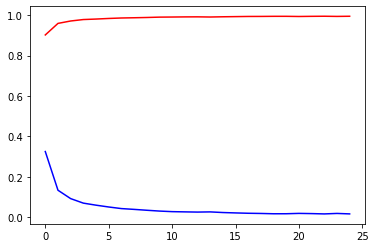

In [96]:
import matplotlib.pyplot as plt

accuracy=model.history.history['accuracy']
loss=model.history.history['loss']

epochs=range(len(accuracy))

plt.plot(epochs,accuracy,'r')
plt.plot(epochs,loss,'b',label='Training loss')
plt.show()

Testing


Predicted output: 9


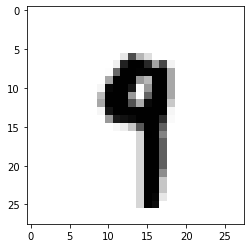

In [97]:
image_index=50
# print("Original output:",y_test[image_index])
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print("Predicted output:",pred.argmax())

In [98]:
score=model.evaluate(x_test,y_test,verbose=1)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

383/383 [==============================] - 1s 2ms/step - loss: 0.0845 - accuracy: 0.9847
Test loss: 0.0845242515206337
Test accuracy: 0.9846530556678772


Predicted output: 1


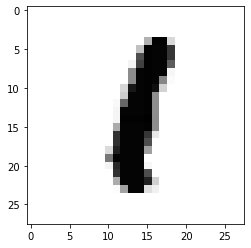

In [92]:
image_index=0
# print("Original output:",y_test[image_index])
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print("Predicted output:",pred.argmax())

In [ ]:
model.save('model.h5')
print("Saved model to disk")

Saved model to disk
